# Imports

In [1]:
import cv2
import matplotlib.pyplot as plt

# Soal 1 (?) - Kmeans for indexed image

## reading images

In [336]:
im011 = cv2.imread("images/011.jpg")
im012 = cv2.imread("images/012.jpg")

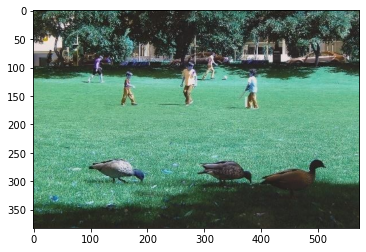

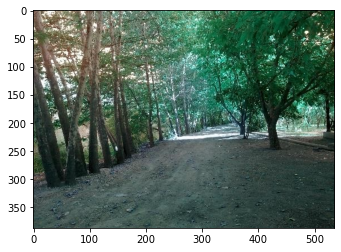

In [338]:
plt.imshow(im011)
plt.show()

plt.imshow(im012)
plt.show()

cv2.cvtColor()

In [345]:
from sklearn.cluster import KMeans


print(im011.shape)

ImportError: DLL load failed while importing _arpack: The specified procedure could not be found.

# Soal 2

## reading image

In [2]:
im021 = cv2.imread("images/021.jpg")
im022 = cv2.imread("images/021.jpg",0)

## test four different thresholds for best result 

In [107]:
_, im023 = cv2.threshold(im022,40,255,0)
_, im024 = cv2.threshold(im022,50,255,0)
_, im025 = cv2.threshold(im022,60,255,0)
_, im026 = cv2.threshold(im022,70,255,0)


## seeing the tresholding result

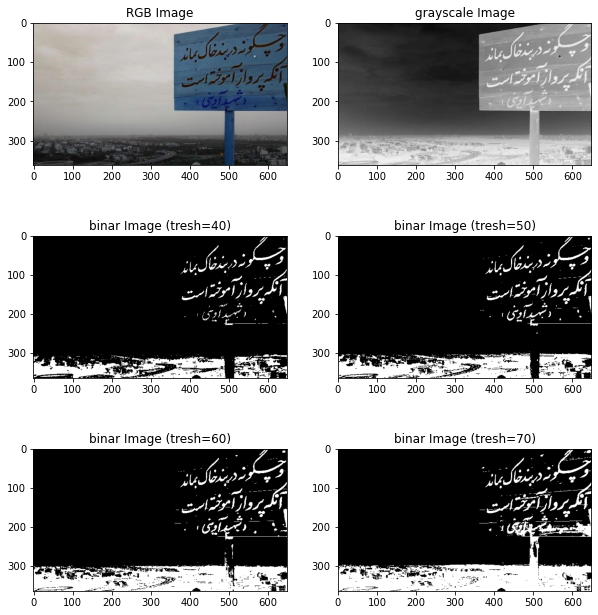

In [108]:
plt.figure(figsize = (10,15))
subplot_rows,subplot_columns = 4,2

plt.subplot(subplot_rows,subplot_columns,1)
plt.title("RGB Image")
plt.imshow(im021)
plt.subplot(subplot_rows,subplot_columns,2)
plt.title("grayscale Image")
plt.imshow(im022,cmap='gray_r')
plt.subplot(subplot_rows,subplot_columns,3)
plt.title("binar Image (tresh=40)")
plt.imshow(im023,cmap='gray_r')
plt.subplot(subplot_rows,subplot_columns,4)
plt.title("binar Image (tresh=50)")
plt.imshow(im024,cmap='gray_r')
plt.subplot(subplot_rows,subplot_columns,5)
plt.title("binar Image (tresh=60)")
plt.imshow(im025,cmap='gray_r')
plt.subplot(subplot_rows,subplot_columns,6)
plt.title("binar Image (tresh=70)")
plt.imshow(im026,cmap='gray_r')

plt.show()

## **best threshold was 50 so we crop "im024"**

In [105]:
# find primary image size
print("image height: ",len(im024),", image width: ",len(im024[0]))

image height:  364 , image width:  649


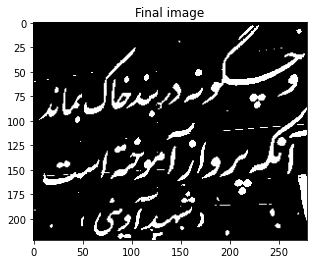

In [111]:
# cropping image and display final result

cropped_im024 = im024[0:222,370:649]
plt.imshow(cropped_im024,cmap='gray_r')
plt.title("Final image")
plt.show()

# Soal 3

## Reading image

In [117]:
im031 = cv2.imread("images/031.jpg")
im032 = cv2.imread("images/031.jpg",0)

## Seperate bit planes

In [153]:
bits = [2**i for i in range(8)]
print("bit numbers:",bits)

bit_planes = [cv2.bitwise_and(im032,bit) for bit in bits]

bit numbers: [1, 2, 4, 8, 16, 32, 64, 128]


## Displaying images without each bit plane

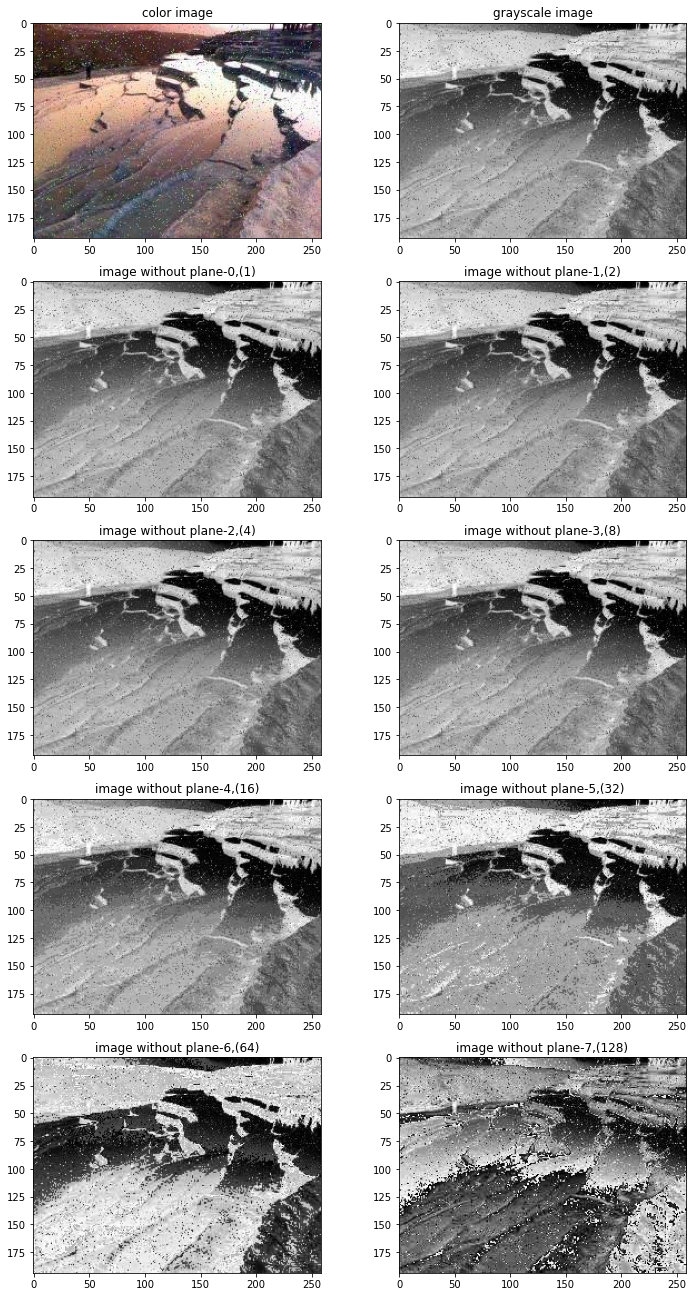

In [154]:
plt.figure(figsize=(12,23))

plt.subplot(5,2,1)
plt.title("color image")
plt.imshow(im031)

plt.subplot(5,2,2)
plt.title("grayscale image")
plt.imshow(im032,cmap='gray_r')

for i in range(8):
    plt.subplot(5,2,3+i)
    plt.title("image without plane-{},({})".format(i,bits[i]))
    plt.imshow(im032-bit_planes[i],cmap='gray_r')
plt.show()

## final image (main image without bit planes 0,1,2)

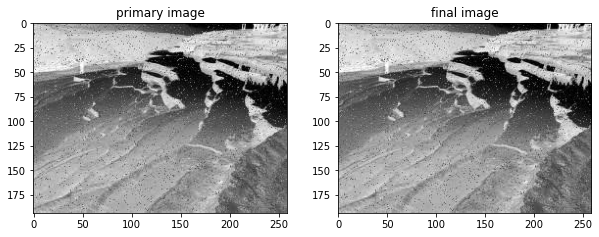

In [288]:
final_image = im032 - (bit_planes[0]+bit_planes[1]+bit_planes[2]+bit_planes[3]+bit_planes[4]+bit_planes[5]+bit_planes[6])/127

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("primary image")
plt.imshow(im032,cmap='gray_r')
plt.subplot(1,2,2)
plt.title("final image")
plt.imshow(final_image,cmap='gray_r')
plt.savefig("final_image")
plt.show()

# Soal 4

In [330]:
im041 = cv2.imread("images/041.jpg")

print('Original Dimensions : ',im041.shape)

scale_percent = 200 # percent of original size
width = int(im041.shape[1] * scale_percent / 100)
height = int(im041.shape[0] * scale_percent / 100)
dim = (width, height)

print(dim)

interpolation_methods = [cv2.INTER_AREA,
                         cv2.INTER_CUBIC,
                         cv2.INTER_LANCZOS4,
                         cv2.INTER_LINEAR,
                         cv2.INTER_NEAREST]
interpolation_methods_names = ["INTER_AREA",
                         "INTER_CUBIC",
                         "INTER_LANCZOS4",
                         "INTER_LINEAR",
                         "INTER_NEAREST"]


Original Dimensions :  (240, 155, 3)
(310, 480)


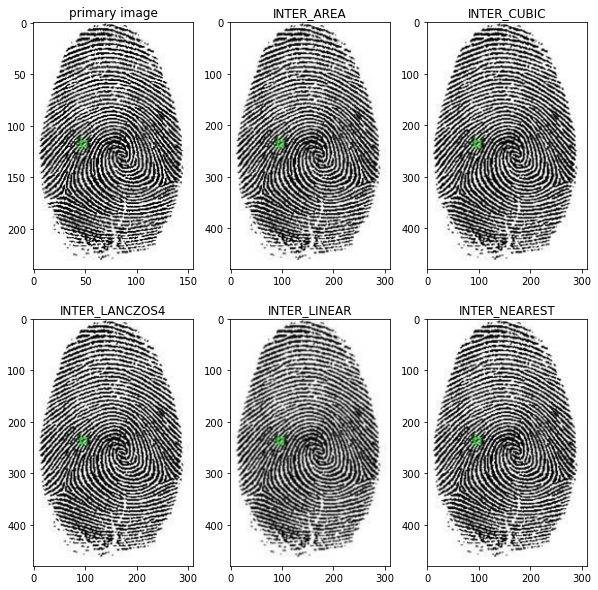

In [341]:
sublot_number = 1

plt.figure(figsize=(10,10))
plt.subplot(2,3,sublot_number)
plt.title("primary image")
plt.imshow(im041)


for inter,inter_name in zip(interpolation_methods,interpolation_methods_names):
    sublot_number += 1
    resized = cv2.resize(im041, dim, interpolation = inter)
    plt.subplot(2,3,sublot_number)
    plt.title(inter_name)
    plt.imshow(resized)
plt.show()
